# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [8]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")


# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [9]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

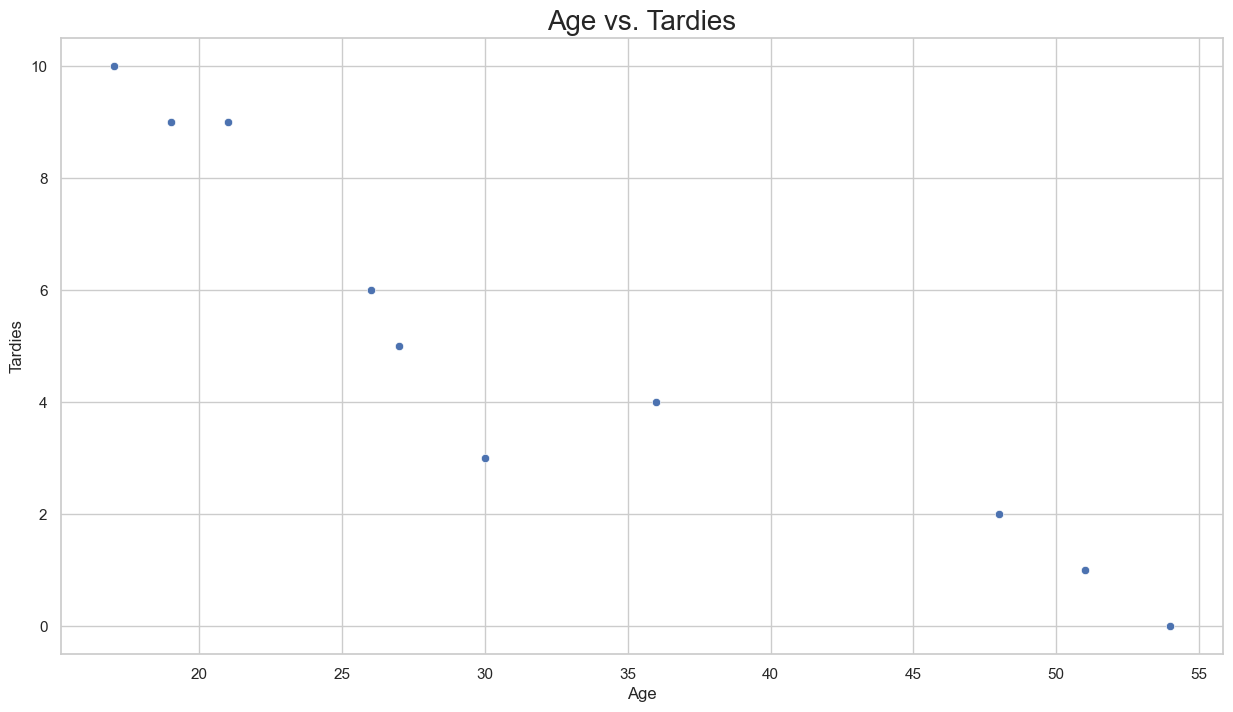

In [10]:
sns.scatterplot(y = student_data.Tardies, x= student_data.Age)
plt.title("Age vs. Tardies", size=20);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Yes, there is a trend. Variables seem to be negatively correlated. As age increases they have less tardies. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [11]:
#Covariance
covariance = student_data.cov()

#Correlation
correlation = student_data.corr()

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [12]:
# 1. X, y: 
X = student_data[["Age"]]
y = student_data.Tardies

# 2. Choose a model: lr
lr = LinearRegression() # Instantiating the model -> draw a straight line

# 3. Fit
lr.fit(X, y) # Draw the straight line based on this data


#My outcome variable will be the number of tardies expected for the age I pass to the model. 
#We are using linear regression so the model will be a linear function with slope (cofficient*x) and interception (y)


LinearRegression()

Plot your regression model on your scatter plot.

In [13]:
student_data["prediction_lr"] = lr.coef_[0] * student_data.Age +  lr.intercept_

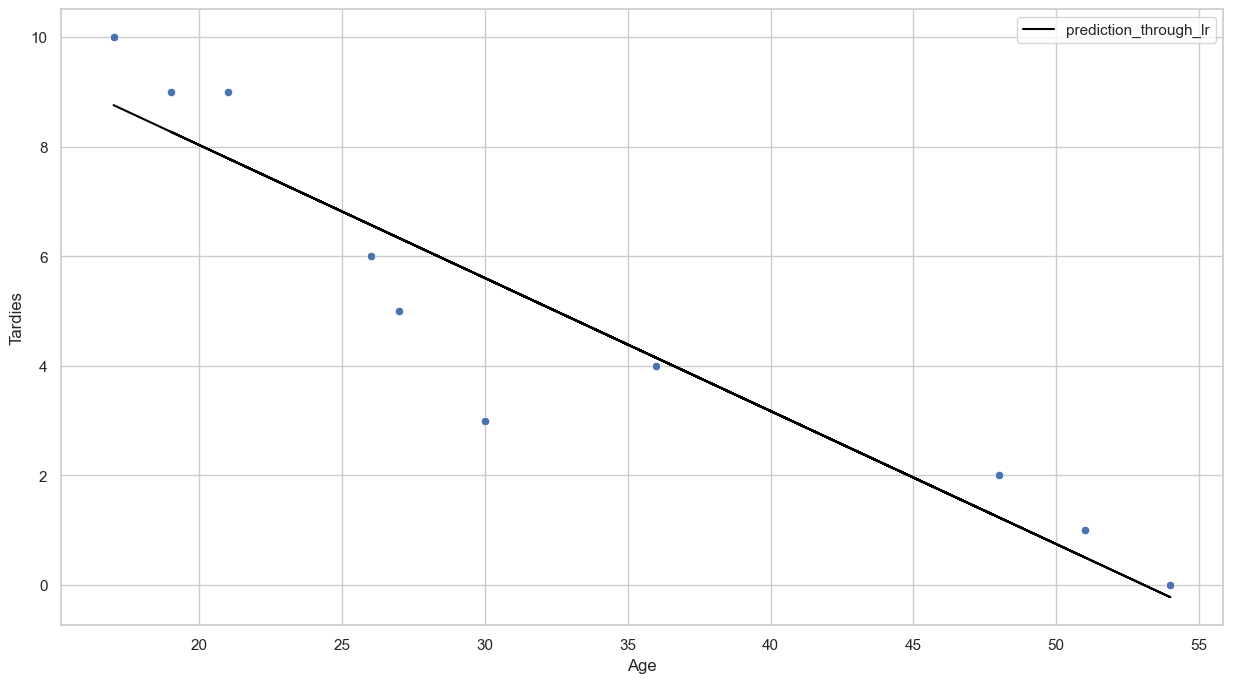

In [14]:
sns.scatterplot(x=student_data.Age, y=student_data.Tardies)
plt.plot(student_data.Age, student_data["prediction_lr"], c="black", label="prediction_through_lr")
plt.legend();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

We can observe that the variables are negatively correlated and age seems to be a good predictor of tardiness.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [15]:
vehicles = pd.read_csv('vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [16]:
#Change columns names to remove spaces and bars so we don't have errors with the names later
vehicles.columns= vehicles.columns.str.replace(' ','_')
vehicles.columns= vehicles.columns.str.replace('/','_')

In [17]:
vehicles[["CO2_Emission_Grams_Mile","Year","Cylinders", "Fuel_Barrels_Year", "Combined_MPG", "Fuel_Cost_Year"]].corr()

,CO2_Emission_Grams_Mile,Year,Cylinders,Fuel_Barrels_Year,Combined_MPG,Fuel_Cost_Year
CO2_Emission_Grams_Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel_Barrels_Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined_MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel_Cost_Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


Except the year, all variables have a significant impact on the CO2 emission. The one that has a higher correlation is the Fuel barrels per year followed by the cost of the fuel.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [18]:
#Multiple Linear Regression

model = smf.ols("CO2_Emission_Grams_Mile ~ Year + Cylinders + Fuel_Barrels_Year + Combined_MPG + Fuel_Cost_Year", data=vehicles).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                             17:38:55   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_Barrels_Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_Cost_Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [20]:
#Since all the P values are near 0 we reject our null hipothesis accepting that all variables influence the prediction of CO2 emissions. 
#The R-squared value is high, what indicates a good fit. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [21]:
df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

Text(0, 0.5, 'Attendees')

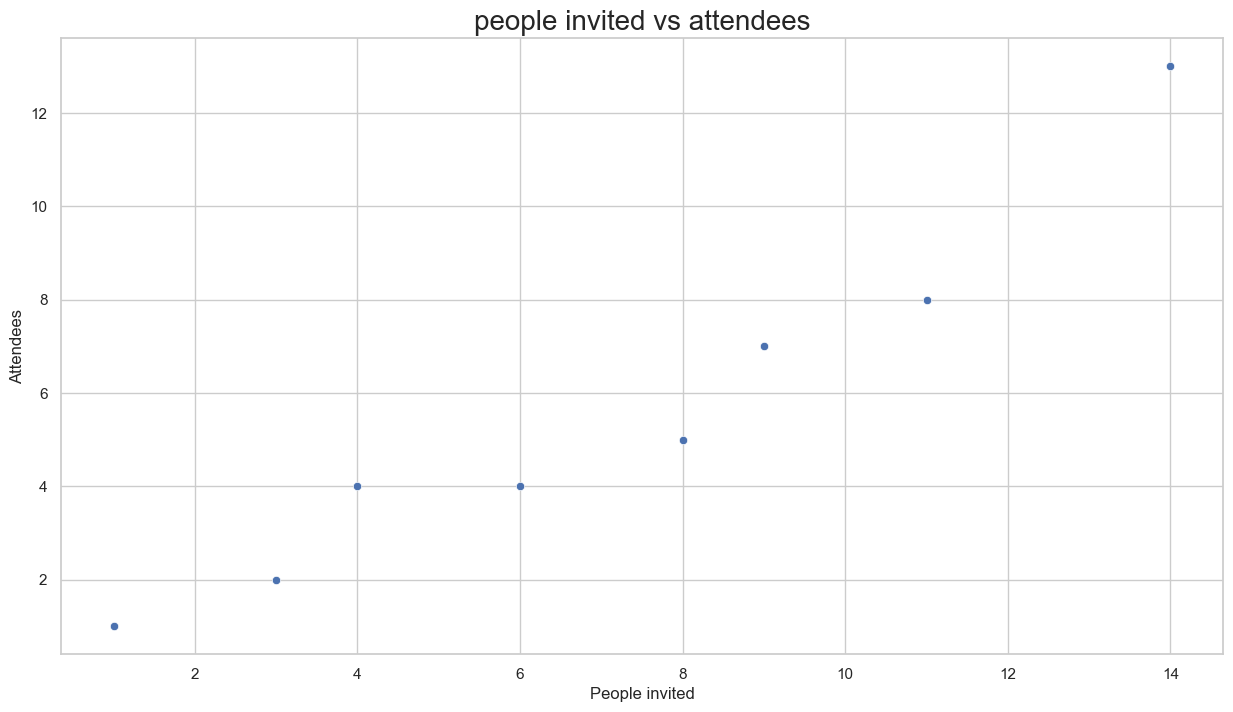

In [22]:
sns.scatterplot(y = df.Y, x= df.X)
plt.title("people invited vs attendees", size=20);
plt.xlabel('People invited')
plt.ylabel('Attendees')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [23]:
#The variables look positively correlated so as we invite more people, more people attend the party. 

In [24]:
# 1. X, y: 
X = df[["X"]]
y = df.Y

# 2. Choose a model: lr
lr = LinearRegression() # Instantiating the model -> draw a straight line

# 3. Fit
lr.fit(X, y) # Draw the straight line based on this data

LinearRegression()

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

<Axes: >

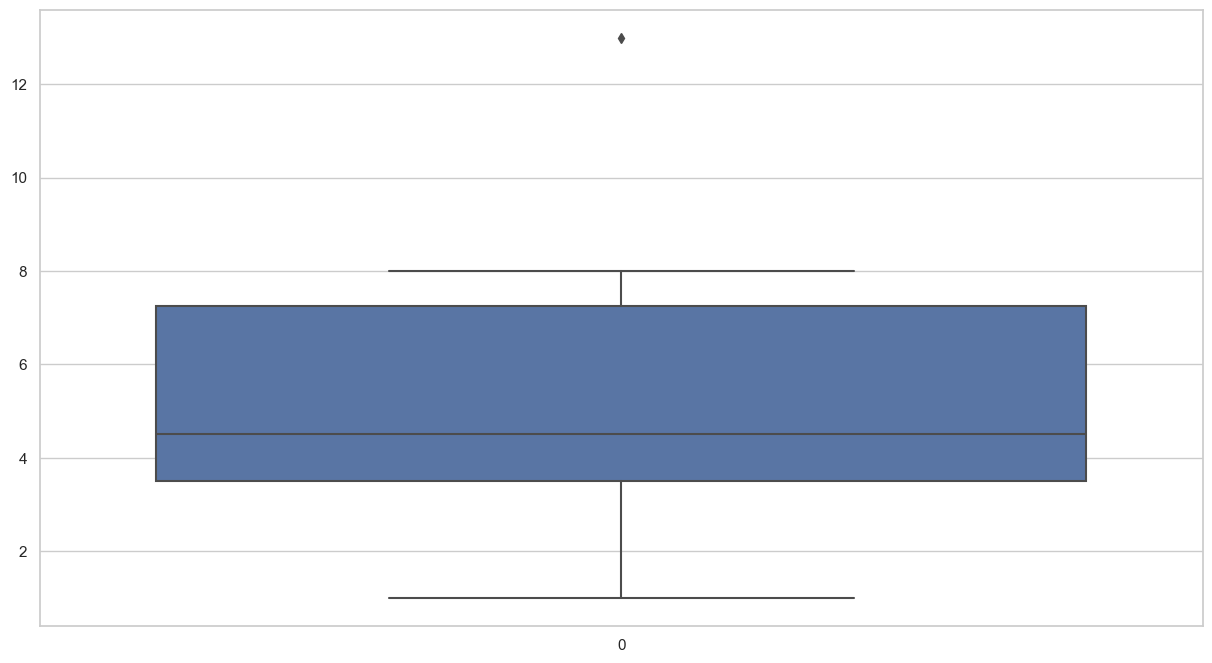

In [25]:
sns.boxplot(df.Y)

In [26]:
#There is an outlier, the (14,13) point
df.loc[df.Y == df.Y.max()].index

Int64Index([7], dtype='int64')

In [27]:
out_outliers = df.drop([7])

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [28]:
# 1. X, y: 
X = out_outliers[["X"]]
y = out_outliers.Y

# 2. Choose a model: lr
lr_out_outliers = LinearRegression() # Instantiating the model -> draw a straight line

# 3. Fit
lr_out_outliers.fit(X, y) # Draw the straight line based on this data

LinearRegression()

In [29]:
print(lr.coef_)
print(lr_out_outliers.coef_)

[0.84848485]
[0.68421053]


In the model with the outlier the attendees increase at a higher rate with the invitations. 